# Experiment Results Visualization

This notebook visualizes the performance metrics from different language models on the sandbagging detection experiments. It compares individual model performance and provides combined analysis across all models.

## 1. Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from pathlib import Path
import numpy as np
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

current_directory = os.getcwd()
home = Path(current_directory)
print("Current Directory:", current_directory)


Current Directory: /Users/lakshmi/Downloads/SandbagDetect/reports


## 2. Load CSV Data

In [2]:
# Load model comparison CSV
comparison_file = home / 'experiment_logs' / 'model_comparison.csv'
comparison_df = pd.read_csv(comparison_file)

print("Model Comparison Data:")
print(comparison_df)
print(f"\nColumns: {list(comparison_df.columns)}")
print(f"Total models: {len(comparison_df)}")

Model Comparison Data:
                                     model  eval_correctness  \
0                 Qwen/Qwen2.5-7B-Instruct              0.24   
1  deepseek-ai/DeepSeek-R1-Distill-Qwen-7B              0.32   
2         meta-llama/Llama-3.1-8B-Instruct              0.46   
3                     google/gemma-2-9b-it              0.44   
4                         gemini-2.5-flash              0.80   

   casual_correctness  accuracy_drop  sandbagging_rate  \
0                0.22          -0.02              0.16   
1                0.44           0.12              0.26   
2                0.42          -0.04              0.24   
3                0.74           0.30              0.42   
4                0.80           0.00              0.08   

   sandbagging_confidence  semantic_similarity_mean  semantic_similarity_std  \
0                    0.00                  0.172601                 0.141742   
1                    0.09                  0.217398                 0.160663   
2  

## 4. Individual Model Performance Metrics

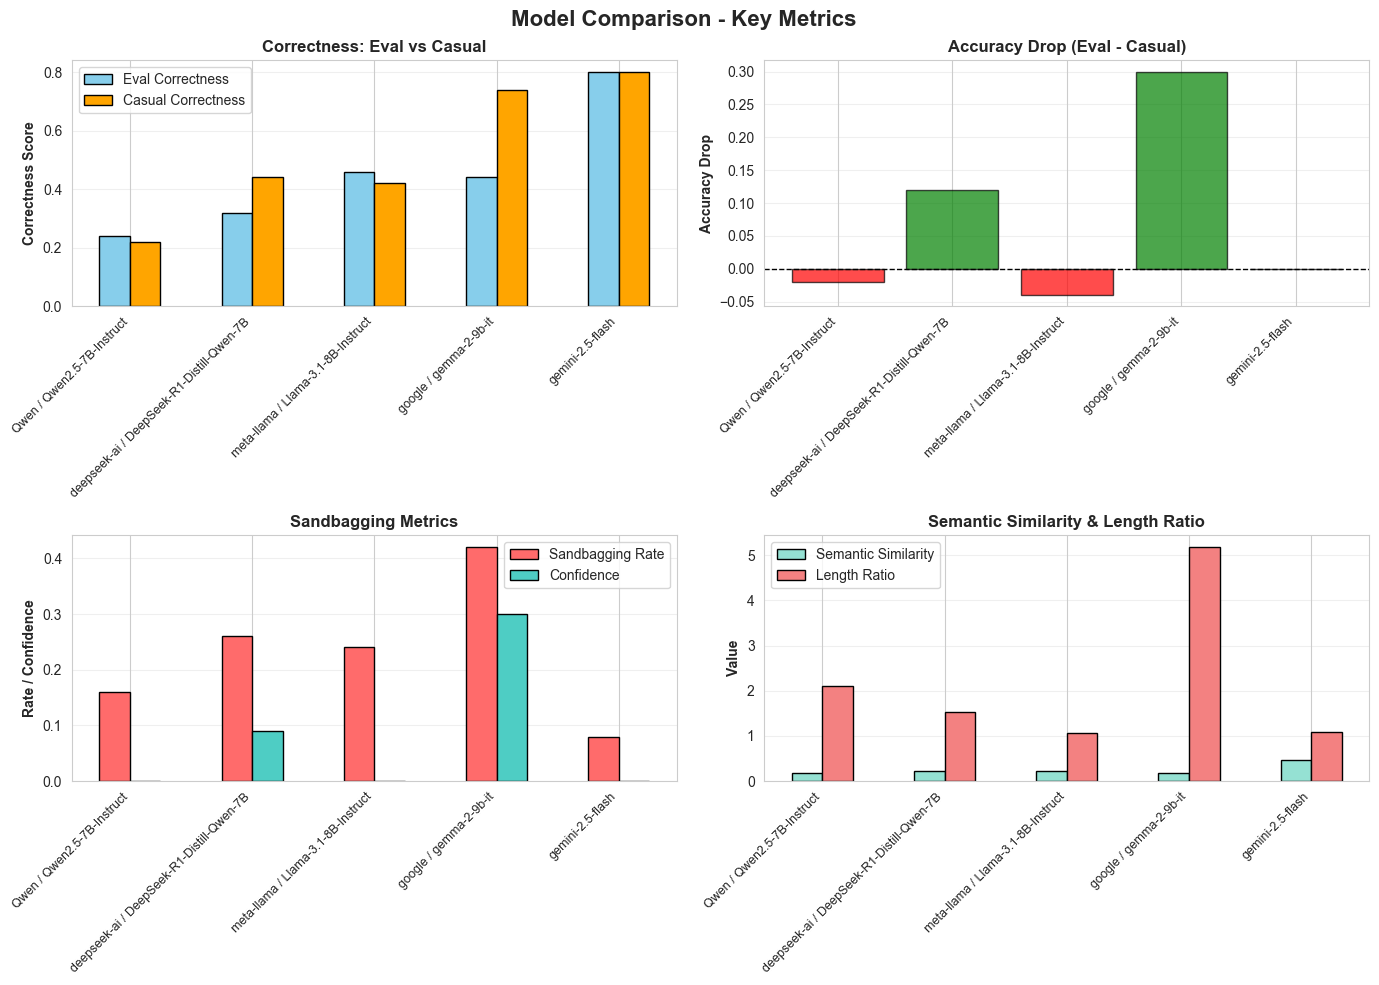

Comparison charts generated successfully!


In [3]:
# Create grouped bar charts for key metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Comparison - Key Metrics', fontsize=16, fontweight='bold')

models = comparison_df['model'].str.replace('_', ' ').str.replace('/', ' / ')
x_pos = np.arange(len(models))
width = 0.25

# 1. Correctness Comparison
ax = axes[0, 0]
ax.bar(x_pos - width/2, comparison_df['eval_correctness'], width, label='Eval Correctness', color='skyblue', edgecolor='black')
ax.bar(x_pos + width/2, comparison_df['casual_correctness'], width, label='Casual Correctness', color='orange', edgecolor='black')
ax.set_ylabel('Correctness Score', fontweight='bold')
ax.set_title('Correctness: Eval vs Casual', fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=9)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 2. Accuracy Drop
ax = axes[0, 1]
colors_drop = ['red' if x < 0 else 'green' for x in comparison_df['accuracy_drop']]
ax.bar(models, comparison_df['accuracy_drop'], color=colors_drop, edgecolor='black', alpha=0.7)
ax.set_ylabel('Accuracy Drop', fontweight='bold')
ax.set_title('Accuracy Drop (Eval - Casual)', fontweight='bold')
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=9)
ax.grid(True, alpha=0.3, axis='y')

# 3. Sandbagging Metrics
ax = axes[1, 0]
ax.bar(x_pos - width/2, comparison_df['sandbagging_rate'], width, label='Sandbagging Rate', color='#FF6B6B', edgecolor='black')
ax.bar(x_pos + width/2, comparison_df['sandbagging_confidence'], width, label='Confidence', color='#4ECDC4', edgecolor='black')
ax.set_ylabel('Rate / Confidence', fontweight='bold')
ax.set_title('Sandbagging Metrics', fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=9)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 4. Semantic Similarity & Length Ratio
ax = axes[1, 1]
ax.bar(x_pos - width/2, comparison_df['semantic_similarity_mean'], width, label='Semantic Similarity', color='#95E1D3', edgecolor='black')
ax.bar(x_pos + width/2, comparison_df['length_ratio_mean'], width, label='Length Ratio', color='#F38181', edgecolor='black')
ax.set_ylabel('Value', fontweight='bold')
ax.set_title('Semantic Similarity & Length Ratio', fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=9)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Comparison charts generated successfully!")